<a href="https://colab.research.google.com/github/FERMEN23/CNN/blob/main/Vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Configuración de nuestro entorno de ejecución

Nota: Es necesario utilizar la GPU

Las celdas que no tienen el módulo time, es dado que su tiempo de ejecución es de milisegundo, en los tiempos de ejecución mostrados en este cuaderno se ha usado la versión de Google Colab Pro


In [1]:
%%time
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 19.18 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.
CPU times: user 85.3 ms, sys: 27.2 ms, total: 113 ms
Wall time: 10.7 s


In [2]:
%%time
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 352.6 MB 11 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=564577b185d618d6a5922db10a793b2271a1a9d954d39207877e784adfbdeb36
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-zahl9t4t/pycocotools_02917790615142c5b1688805b2e6700c
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-zahl9t4t/pycocotools_02917790615142c5b1688805b2e6700c
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263851 sha256=af6c3c06d69c6c4aba5887b927672c82b5cbbf424f9f8eaf10ab988e4b901bde
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [3]:
%%time
#Version de tqmd para colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

#Arquitectura de red Efficeintnet
!pip install efficientnet_pytorch
!pip install tensorboardX

     \ 91 kB 4.3 MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47878 sha256=cd0458fec18c9a9c83fb2d447e23aaa0dd5d5450c5052994b5c683c07a25cec7
  Stored in directory: /tmp/pip-ephem-wheel-cache-4rvqtw05/wheels/b5/36/d9/593e7ac06d343d0a32138fa6c402dc3a0bd31442c9fe53f76c
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.28.1 which is incompatible.
fbprophet 0.7.1 requires tqdm>=4.36.1, but you have tqdm 4.28.1 which is incompatible.
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl

##Obtener Datos de Roboflow

Recuerde que el espacio ENLACE corresponde al código de descarga en el formato COCO Json proporcionado por Roboflow 

In [4]:
%%time
!curl -L "ENLACE" > \
roboflow.zip; unzip roboflow.zip; \
rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   879  100   879    0     0    725      0  0:00:01  0:00:01 --:--:--   725
100 38.9M  100 38.9M    0     0  21.4M      0  0:00:01  0:00:01 --:--:-- 97.6M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg  
 extracting: test/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg  
 extracting: test/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg  
 extracting: test/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg  
 extracting: test/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg  
 extracting: test/10c26c6598677a1f_jpg.rf.f72b2

##Estructura para los datos 

En las siguientes tres celdas, movemos los datos a una estructura que la biblioteca de detección de imágenes esperará

In [ ]:
!mkdir War
!mkdir War/annotations
!mkdir War/Annotations
!mkdir War/Images

In [ ]:
%cp train/_annotations.coco.json War/annotations/instances_Images.json

In [ ]:
%cp train/*.jpg War/Images/

##Entrenamiento

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
%%time
from train_detector import Detector

CPU times: user 813 ms, sys: 515 ms, total: 1.33 s
Wall time: 13.5 s


In [ ]:
gtf = Detector();

In [ ]:
#dirige el modelo hacia la estructura de archivos
root_dir = "./";
coco_dir = "War";
img_dir = "./";
set_dir = "Images";

In [ ]:
#Preparar los datos
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=10, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
%%time
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0
CPU times: user 2.12 s, sys: 1.28 s, total: 3.4 s
Wall time: 10.7 s


In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [ ]:
%%time
gtf.Train(num_epochs=280, model_output_dir="trained/");

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might caus

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:2720: UserWarning: Exporting aten::index operator with indices of type Byte. Only 1-D indices are supported. In any other case, this will produce an incorrect ONNX graph.
  warnings.warn("Exporting aten::index operator with indices of type Byte. "
/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:701: UserWarning: This model contains a squeeze operation on dimension 1 on an input with unknown shape. Note that if the size of dimension 1 of the input is not 1, the ONNX model will return an error. Opset version 11 supports squeezing on non-singleton dimensions, it is recommended to export this model using opset version 11 or higher.
  "version 11 or higher.")



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



faild onnx export



Epoch   105: reducing learning rate of group 0 to 1.0000e-05.



Epoch   132: reducing learning rate of group 0 to 1.0000e-06.



Epoch   143: reducing learning rate of group 0 to 1.0000e-07.



Epoch   150: reducing learning rate of group 0 to 1.0000e-08.



faild onnx export



CPU times: user 8h 31min 21s, sys: 14min 38s, total: 8h 46min
Wall time: 8h 24min 10s


##Resultados

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf2 = Infer();

In [ ]:
%%time
gtf2.Model(model_dir="trained/")

CPU times: user 70.3 ms, sys: 6.09 ms, total: 76.4 ms
Wall time: 78 ms


In [ ]:
%%time
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

print(class_list)

['vehicles', 'Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']
CPU times: user 7.7 ms, sys: 1.98 ms, total: 9.68 ms
Wall time: 9.05 ms


In [ ]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf2.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.049s)
CPU times: user 75.7 ms, sys: 1.95 ms, total: 77.7 ms
Wall time: 71.1 ms


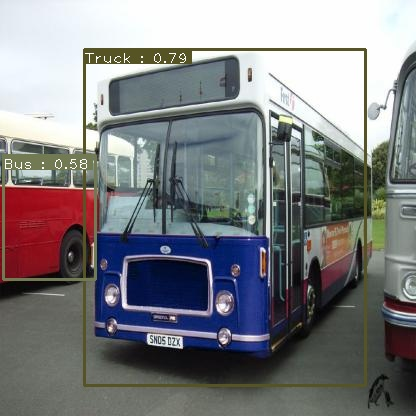

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 

##Exportar los pesos de nuestro modelo a nuestra unidad de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/